# Simple building designer

- Load material characteristics from library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from data_h358 import *
import buildingenergy.model
from data_h358 import *
from buildingenergy.building import InterfaceType, Site, StateModel
from buildingenergy.data import Data
from buildingenergy.model import Model
from buildingenergy.parameters import ParameterSet
from buildingenergy.runner import ExtraRunner

Site.library.store('concrete', 'thermal', 269)
Site.library.store('gypsum', 'thermal', 265)
Site.library.store('wood_floor', 'thermal', 264)
Site.library.store('tile', 'thermal', 236)
Site.library.store('glass_wood', 'thermal', 261)
Site.library.store('glass', 'thermal', 267)
Site.library.store('plaster', 'thermal', 265)
Site.library.store('foam', 'thermal', 260)
Site.library.store('polystyrene', 'thermal', 145)
Site.library.store('brick', 'thermal', 268)
Site.library.store('wood', 'thermal', 277)
Site.library.store('air', 'thermal', 259)
Site.library.store('usual', 'thermal', 278)

bindings: Tuple[str, str | List[str]] = ('TZcorridor', 'Tcorridor'), ('TZdownstairs', 'Tdownstairs'), ('TZoutdoor', 'weather_temperature'), ('PZoffice', ['total_electric_power', 'Psun_window', 'Pmetabolism', 'Pheater']), ('CCO2_corridor', 'corridor_CO2_concentration'), ('CCO2_outdoor', 'outdoorCCO2'), ('PCO2_office', 'CO2production'), ('Qoutdoor', 'Qoutdoor'), ('Qcorridor', 'Qcorridor'), ('TZoffice', 'Toffice_reference'), ('CCO2_office', 'office_CO2_concentration'), ('CCO2_corridor', 'corridor_CO2_concentration')


parameter_set = ParameterSet(resolution=100)
parameter_set.add_time_varying('Qoutdoor', 50/3600, 2/3600, 540/3600)
parameter_set.add_invariant('Qoutdoor0', 50/3600)
parameter_set.add_invariant('Qoutdoor_window', 210/3600, 1/3600, 500/3600)
parameter_set.add_invariant('Qoutdoor_door', 365/3600, 1/3600, 500/3600)

parameter_set.add_time_varying('Qcorridor', 40/3600, 2/3600, 540/3600)
parameter_set.add_invariant('Qcorridor0', 40/3600)
parameter_set.add_invariant('Qcorridor_window', 246/3600, 1/3600, 500/3600)
parameter_set.add_invariant('Qcorridor_door', 296/3600, 1/3600, 500/3600)

parameter_set.add_invariant('body_metabolism', 60)
parameter_set.add_invariant('heater_power_per_delta_surface_temperature', 90)
parameter_set.add_invariant('CO2_occupant_breath_production', 2)
parameter_set.add_invariant('solar_factor', .4)

h358_data = H358Data('16/02/2015', '23/02/2015') # '16/02/2015', '23/02/2015'
Qoutdoor(h358_data, parameter_set)
Qcorridor(h358_data, parameter_set)
CO2production(h358_data, parameter_set)
Pheater(h358_data, parameter_set)
Pheat(h358_data, parameter_set)
Pmetabolim(h358_data, parameter_set)

Available properties:
- thermal
- Uw_glazing
- glass_transparency
- shading
- solar_absorptivity
- gap_resistance
- ground_reflectance
> get property "conductivity (W/m.K)" for "concrete"
> get property "specific heat capacity (J/kg/K)" for "concrete"
> get property "density (kg/m3)" for "concrete"
> get property "emmisivity coefficient" for "concrete"
> get property "conductivity (W/m.K)" for "plaster"
> get property "specific heat capacity (J/kg/K)" for "plaster"
> get property "density (kg/m3)" for "plaster"
> get property "emmisivity coefficient" for "plaster"
> get property "conductivity (W/m.K)" for "heavyweight wood"
> get property "specific heat capacity (J/kg/K)" for "heavyweight wood"
> get property "density (kg/m3)" for "heavyweight wood"
> get property "emmisivity coefficient" for "heavyweight wood"
> get property "conductivity (W/m.K)" for "Clay Tile – HF-C1"
> get property "specific heat capacity (J/kg/K)" for "Clay Tile – HF-C1"
> get property "density (kg/m3)" for "Clay

- Make walls, floors,...

*Site has been propagated: True with thermal state space order: -1
zone "office" with an temperature "TZoffice", and airflows quantities: "{'Qoutdoor': 1.0, 'Qcorridor': 1.0}" (is_known: False, is_simulated: True) and power gain "PZoffice"
   with incoming air flows:
airflow coming from zone "Qoutdoor" injected into zone "office" with weight 1.000000. Propagated quantities are: {'Qoutdoor': 1.0} (is_input: True)
airflow coming from zone "Qcorridor" injected into zone "office" with weight 1.000000. Propagated quantities are: {'Qcorridor': 1.0} (is_input: True)

   and outgoing air flows:
airflow coming from zone "Qoffice" injected into zone "outdoor" with weight 1.000000. Propagated quantities are: {} (is_input: False)
airflow coming from zone "Qoffice" injected into zone "corridor" with weight 1.000000. Propagated quantities are: {} (is_input: False)
zone "corridor" with an temperature "TZcorridor", and airflows quantities: "{'Qcorridor': 1}" (is_known: True, is_simulated: False) and p

45:25 LTIPGReductor: Operator projection ...
45:25 LTIPGReductor: Building ROM ...



Reduction
*

45:25 LTIPGReductor: Operator projection ...
45:25 LTIPGReductor: Building ROM ...


* Time constants:
0days, 23hours, 12min, 55sec
0days, 0hours, 5min, 36sec
0days, 0hours, 5min, 36sec
* Static gains:
[TZoffice]
=
[0.0159652005111465]
*
[PZoffice]
+
[0.428235939805948  0  0.548571896676136]
*
[TZcorridor, TZdownstairs, TZoutdoor]
* transmission coefficients:
TZcorridor : 26.82 W/K
TZdownstairs : 0.00 W/K
TZoutdoor : 34.36 W/K
State Model:
d/dt ['X0', 'X1', 'X2'] =
⎡-3.06855698838309e-5   -0.000165960147757424  0.000136761534163253⎤
⎢                                                                  ⎥
⎢-0.000108409687526969  -0.00092433552292587   0.00147451104792471 ⎥
⎢                                                                  ⎥
⎣-0.00013635672139467   -0.00136169032270811   -0.00115766673528167⎦
['X0', 'X1', 'X2'] +
⎡0.00323774025579947  0  0.00271090384703956⎤
⎢                                           ⎥
⎢0.0141579821748844   0  0.00140935056763115⎥
⎢                                           ⎥
⎣0.00686930359669057  0  0.00487647611673944⎦
['TZcorridor', 'TZd

45:25 LTIPGReductor: Operator projection ...
45:25 LTIPGReductor: Building ROM ...


..*

45:26 LTIPGReductor: Operator projection ...
45:26 LTIPGReductor: Building ROM ...


.*

45:26 LTIPGReductor: Operator projection ...
45:26 LTIPGReductor: Building ROM ...


*

45:26 LTIPGReductor: Operator projection ...
45:26 LTIPGReductor: Building ROM ...


.*

45:27 LTIPGReductor: Operator projection ...
45:27 LTIPGReductor: Building ROM ...
45:27 LTIPGReductor: Operator projection ...
45:27 LTIPGReductor: Building ROM ...


**

45:27 LTIPGReductor: Operator projection ...
45:27 LTIPGReductor: Building ROM ...


*

45:27 LTIPGReductor: Operator projection ...
45:27 LTIPGReductor: Building ROM ...


.*

45:28 LTIPGReductor: Operator projection ...
45:28 LTIPGReductor: Building ROM ...


..........*

45:28 LTIPGReductor: Operator projection ...
45:28 LTIPGReductor: Building ROM ...


..*

45:28 LTIPGReductor: Operator projection ...
45:28 LTIPGReductor: Building ROM ...


*

45:29 LTIPGReductor: Operator projection ...
45:29 LTIPGReductor: Building ROM ...


*

45:29 LTIPGReductor: Operator projection ...
45:29 LTIPGReductor: Building ROM ...


..*

45:29 LTIPGReductor: Operator projection ...
45:29 LTIPGReductor: Building ROM ...
45:29 LTIPGReductor: Operator projection ...
45:29 LTIPGReductor: Building ROM ...


.*....................*

45:30 LTIPGReductor: Operator projection ...
45:30 LTIPGReductor: Building ROM ...


..*

45:30 LTIPGReductor: Operator projection ...
45:30 LTIPGReductor: Building ROM ...


*

45:30 LTIPGReductor: Operator projection ...
45:30 LTIPGReductor: Building ROM ...


...*

45:31 LTIPGReductor: Operator projection ...
45:31 LTIPGReductor: Building ROM ...


...........*

45:31 LTIPGReductor: Operator projection ...
45:31 LTIPGReductor: Building ROM ...
45:31 LTIPGReductor: Operator projection ...
45:31 LTIPGReductor: Building ROM ...


*

45:31 LTIPGReductor: Operator projection ...
45:31 LTIPGReductor: Building ROM ...


**

45:32 LTIPGReductor: Operator projection ...
45:32 LTIPGReductor: Building ROM ...


*

45:32 LTIPGReductor: Operator projection ...
45:32 LTIPGReductor: Building ROM ...


..*

45:32 LTIPGReductor: Operator projection ...
45:32 LTIPGReductor: Building ROM ...
45:32 LTIPGReductor: Operator projection ...
45:32 LTIPGReductor: Building ROM ...


..*.............*

45:33 LTIPGReductor: Operator projection ...
45:33 LTIPGReductor: Building ROM ...


*

45:33 LTIPGReductor: Operator projection ...
45:33 LTIPGReductor: Building ROM ...
45:33 LTIPGReductor: Operator projection ...
45:33 LTIPGReductor: Building ROM ...


**

45:33 LTIPGReductor: Operator projection ...
45:33 LTIPGReductor: Building ROM ...


..*

45:34 LTIPGReductor: Operator projection ...
45:34 LTIPGReductor: Building ROM ...


*

45:34 LTIPGReductor: Operator projection ...
45:34 LTIPGReductor: Building ROM ...


.*

45:34 LTIPGReductor: Operator projection ...
45:34 LTIPGReductor: Building ROM ...
45:35 LTIPGReductor: Operator projection ...
45:35 LTIPGReductor: Building ROM ...


.*..........................................................

45:35 LTIPGReductor: Operator projection ...
45:35 LTIPGReductor: Building ROM ...


...**

45:35 LTIPGReductor: Operator projection ...
45:35 LTIPGReductor: Building ROM ...


.*

45:36 LTIPGReductor: Operator projection ...
45:36 LTIPGReductor: Building ROM ...


*

45:36 LTIPGReductor: Operator projection ...
45:36 LTIPGReductor: Building ROM ...


.........


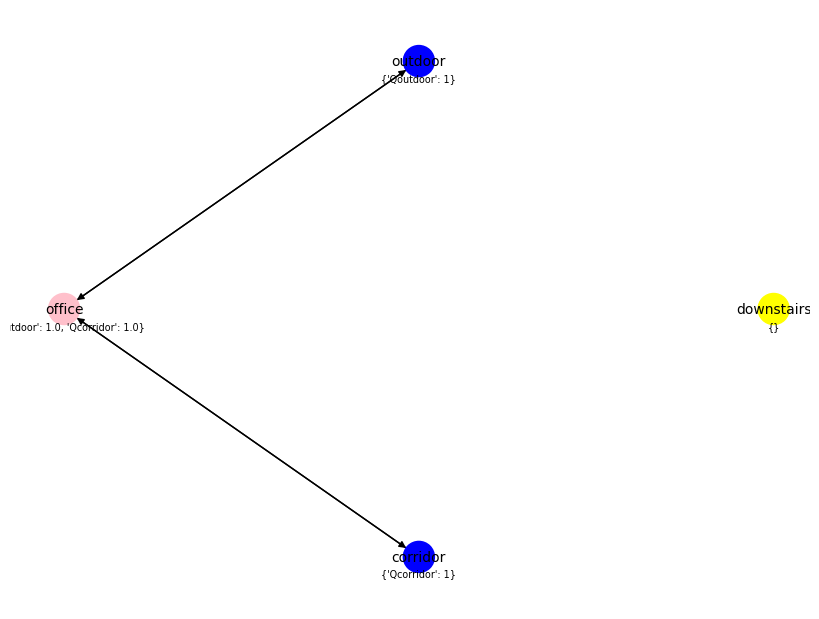

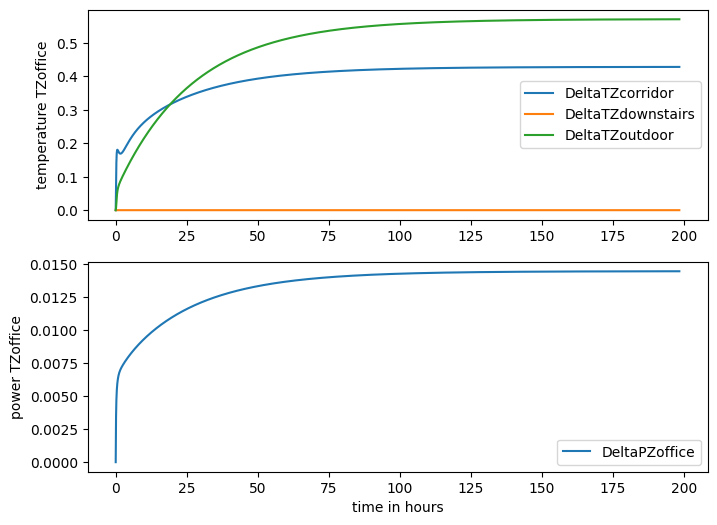

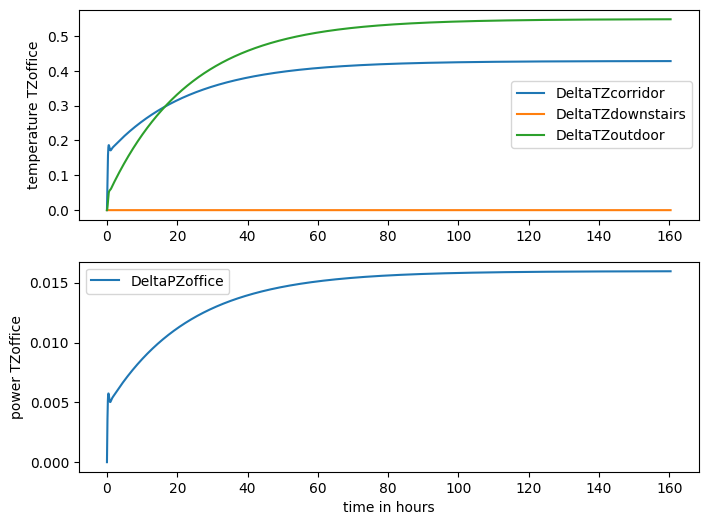

In [9]:
class H358Model(buildingenergy.model.Model):

    def __init__(self, order: int, parameter_set: ParameterSet):
        super().__init__(order, parameter_set)
        self.param = parameter_set
        self.site: Site = None

    def make_differential_state_model(self, parameter_set: ParameterSet) -> StateModel:
        self.site = Site('office', 'corridor', 'downstairs')
        
        # corridor wall
        door_surface = 80e-2 * 200e-2
        door = self.site.add_layered_interface('office', 'corridor', InterfaceType.DOOR, door_surface)
        door.add_layer('wood', 5e-3)
        door.add_layer('air', 15e-3)
        door.add_layer('wood', 5e-3)

        glass_surface = 100e-2 * 100e-2
        glass = self.site.add_layered_interface('office', 'corridor', InterfaceType.GLAZING, glass_surface)
        glass.add_layer('glass', 4e-3)

        internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
        cupboard_corridor_surface = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
        corridor_wall_surface = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

        cupboard = self.site.add_layered_interface('office', 'corridor', InterfaceType.WALL, cupboard_corridor_surface)
        cupboard.add_layer('wood', 20e-3)
        cupboard.add_layer('air', 50e-2 - 20e-3)
        cupboard.add_layer('plaster', 13e-3)
        cupboard.add_layer('foam', 34e-3)
        cupboard.add_layer('plaster', 13e-3)

        plain_corridor_wall = self.site.add_layered_interface('office', 'corridor', InterfaceType.WALL, corridor_wall_surface)
        plain_corridor_wall.add_layer('plaster', 13e-3)
        plain_corridor_wall.add_layer('foam', 34e-3)
        plain_corridor_wall.add_layer('plaster', 13e-3)

        # outdoor wall
        west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
        east_glass_surface = 36e-2 * 56e-2
        windows_surface = west_glass_surface + east_glass_surface
        no_cavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
        cavity_surface = 315e-2 * 2.5 - west_glass_surface

        windows = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, windows_surface)
        windows.add_layer('glass', 4e-3)
        windows.add_layer('air', 12e-3)
        windows.add_layer('glass', 4e-3)

        plain_wall = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, no_cavity_surface)
        plain_wall.add_layer('concrete', 30e-2)

        cavity_wall = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, cavity_surface)
        cavity_wall.add_layer('wood', 20e-3)
        cavity_wall.add_layer('air', 34e-2)
        cavity_wall.add_layer('concrete', 30e-2)

        # slab
        slab_effective_thickness = 12e-2
        slab_surface: float = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
        slab = self.site.add_layered_interface('office', 'downstairs', InterfaceType.WALL, slab_surface)
        slab.add_layer('concrete', slab_effective_thickness)
        slab.add_layer('air', 20e-2)
        slab.add_layer('polystyrene', 7e-3)
        bridge = self.site.add_component_interface('office', 'outdoor', InterfaceType.BRIDGE, 0.5 * 0.99, 685e-2)  # ThBAT booklet 5, 3.1.1.2, 22B)

        self.site.simulated_zone('office', 56)
        self.site.connect_airflow('outdoor', 'office', 1)
        self.site.connect_airflow('office', 'outdoor', 1)
        self.site.connect_airflow( 'office', 'corridor', 1)
        self.site.connect_airflow( 'corridor', 'office', 1)
        
        self.thermal_differential_state_model, self.CO2_differential_state_model = self.site.make(order=self.order, air_flows={'Qoutdoor': parameter_set('Qoutdoor0'), 'Qcorridor': parameter_set('Qcorridor0')})
        global_differential_state_model = self.site.assemble(self.thermal_differential_state_model, self.CO2_differential_state_model)
        return global_differential_state_model

h358_model = H358Model(order=None, parameter_set=parameter_set)
h358_model.make_differential_state_model(parameter_set=parameter_set)
h358_model.site.draw_airflow_net()
print(h358_model.site)
h358_model.site.print_thermal_characteristics(h358_model.thermal_differential_state_model)
runner = ExtraRunner(bindings=bindings, parameter_set=parameter_set, data=h358_data, model=h358_model)
runner.simulate()
runner.memorize('_sim_complete', inputs=False)

print('Reduction')
order: int = 3
h358_model_reduced = H358Model(order=order, parameter_set=parameter_set)
h358_model_reduced.make_differential_state_model(parameter_set=parameter_set)
h358_model_reduced.site.print_thermal_characteristics(h358_model_reduced.thermal_differential_state_model)
h358_model_reduced.site.print_state_model(h358_model_reduced.thermal_differential_state_model)
h358_model_reduced.site.print_CO2_characteristics(h358_model_reduced.CO2_differential_state_model)
h358_model_reduced.site.print_state_model(h358_model_reduced.CO2_differential_state_model)

runner = ExtraRunner(bindings=bindings, parameter_set=parameter_set, data=h358_data, model=h358_model_reduced)
runner.simulate()
runner.memorize('_sim_order%i' % order, inputs=False)
runner.plot()

- ## Simulation

## Decomposition of concrete layers

* Time constants:
0days, 23hours, 21min, 20sec
0days, 10hours, 14min, 22sec
0days, 5hours, 29min, 50sec
0days, 3hours, 51min, 59sec
0days, 3hours, 15min, 46sec
0days, 1hours, 59min, 9sec
0days, 1hours, 32min, 8sec
0days, 0hours, 50min, 50sec
0days, 0hours, 41min, 37sec
0days, 0hours, 36min, 48sec
0days, 0hours, 29min, 29sec
0days, 0hours, 21min, 46sec
0days, 0hours, 18min, 50sec
0days, 0hours, 15min, 49sec
0days, 0hours, 15min, 20sec
0days, 0hours, 13min, 36sec
0days, 0hours, 10min, 22sec
0days, 0hours, 9min, 19sec
0days, 0hours, 8min, 27sec
0days, 0hours, 8min, 17sec
0days, 0hours, 7min, 21sec
0days, 0hours, 6min, 46sec
0days, 0hours, 6min, 12sec
0days, 0hours, 4min, 29sec
0days, 0hours, 3min, 4sec
0days, 0hours, 2min, 45sec
0days, 0hours, 2min, 14sec
0days, 0hours, 0min, 46sec
0days, 0hours, 0min, 35sec
0days, 0hours, 0min, 12sec
* Static gains:
[TZoffice]
=
[0.00876322677216439]
*
[PZoffice]
+
[0.260655621210203  0.402076915031881  0.337267463757888]
*
[TZcorridor, TZdownstairs, TZo

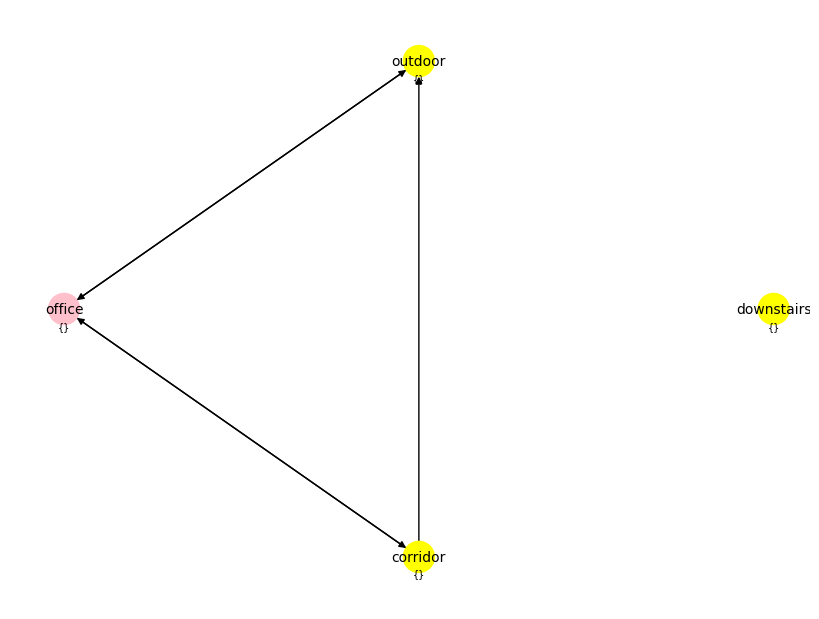

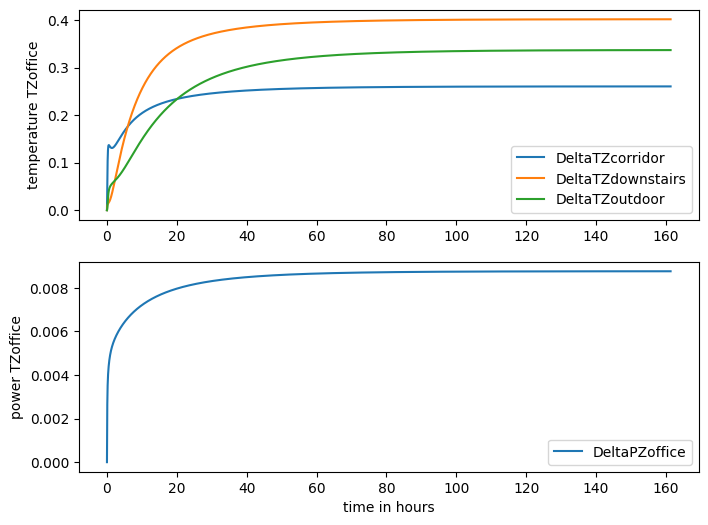

In [5]:
# corridor wall
site_layers = Site('office', 'corridor', 'downstairs')

door_surface = 80e-2 * 200e-2
door = site_layers.add_layered_interface('office', 'corridor', InterfaceType.DOOR, door_surface)
door.add_layer('wood', 5e-3)
door.add_layer('air', 15e-3)
door.add_layer('wood', 5e-3)

glass_surface = 100e-2 * 100e-2
glass = site_layers.add_layered_interface('office', 'corridor', InterfaceType.GLAZING, glass_surface)
glass.add_layer('glass', 4e-3)

internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
cupboard_corridor_surface = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
corridor_wall_surface = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

cupboard = site_layers.add_layered_interface('office', 'corridor', InterfaceType.WALL, cupboard_corridor_surface)
cupboard.add_layer('wood', 20e-3)
cupboard.add_layer('air', 50e-2 - 20e-3)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('foam', 34e-3)
cupboard.add_layer('plaster', 13e-3)

plain_corridor_wall = site_layers.add_layered_interface('office', 'corridor', InterfaceType.WALL, corridor_wall_surface)
plain_corridor_wall.add_layer('plaster', 13e-3)
plain_corridor_wall.add_layer('foam', 34e-3)
plain_corridor_wall.add_layer('plaster', 13e-3)

# outdoor wall
west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
east_glass_surface = 36e-2 * 56e-2
windows_surface = west_glass_surface + east_glass_surface
no_cavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
cavity_surface = 315e-2 * 2.5 - west_glass_surface

windows = site_layers.add_layered_interface('office', 'outdoor', InterfaceType.WALL, windows_surface)
windows.add_layer('glass', 4e-3)
windows.add_layer('air', 12e-3)
windows.add_layer('glass', 4e-3)

plain_wall = site_layers.add_layered_interface('office', 'outdoor', InterfaceType.WALL, no_cavity_surface)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)

cavity_wall = site_layers.add_layered_interface('office', 'outdoor', InterfaceType.WALL, cavity_surface)
cavity_wall.add_layer('wood', 20e-3)
cavity_wall.add_layer('air', 34e-2)
cavity_wall.add_layer('concrete', 30e-2)

# slab
slab_effective_thickness = 12e-2
slab_surface = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
slab = site_layers.add_layered_interface('office', 'downstairs', InterfaceType.WALL, slab_surface)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('air', 20e-2)
slab.add_layer('polystyrene', 7e-3)
bridge = site_layers.add_component_interface('office', 'outdoor', InterfaceType.BRIDGE, 0.5 * 0.99, 685e-2)  # ThBAT booklet 5, 3.1.1.2, 22B)

site_layers.simulated_zone('office', 56)
site_layers.connect_airflow('outdoor', 'office', 1)
site_layers.connect_airflow('office', 'outdoor', 1)
site_layers.connect_airflow( 'office', 'corridor', 1)
site_layers.connect_airflow( 'corridor', 'office', 1)
site_layers.connect_airflow('corridor', 'outdoor', 1)
site_layers.draw_airflow_net()

thermal_model_layer, CO2_model = site_layers.make(order=None, air_flows={'Qoutdoor': 50/3600, 'Qcorridor': 40/3600})

site_layers.print_thermal_characteristics(thermal_model_layer)

## indoor-outdoor insulation (15cm of foam)

### from inside

* Time constants:
1days, 23hours, 35min, 4sec
1days, 19hours, 17min, 37sec
0days, 22hours, 49min, 34sec
0days, 17hours, 41min, 40sec
0days, 15hours, 21min, 58sec
0days, 14hours, 36min, 23sec
0days, 14hours, 14min, 28sec
0days, 6hours, 51min, 20sec
0days, 5hours, 20min, 12sec
0days, 4hours, 37min, 57sec
0days, 1hours, 55min, 42sec
0days, 0hours, 43min, 3sec
0days, 0hours, 34min, 4sec
0days, 0hours, 27min, 37sec
0days, 0hours, 22min, 59sec
0days, 0hours, 20min, 21sec
0days, 0hours, 14min, 49sec
0days, 0hours, 10min, 48sec
0days, 0hours, 8min, 45sec
0days, 0hours, 8min, 41sec
0days, 0hours, 8min, 34sec
0days, 0hours, 8min, 11sec
0days, 0hours, 8min, 9sec
0days, 0hours, 8min, 9sec
0days, 0hours, 7min, 24sec
0days, 0hours, 7min, 22sec
0days, 0hours, 6min, 51sec
0days, 0hours, 6min, 47sec
0days, 0hours, 6min, 10sec
0days, 0hours, 5min, 36sec
0days, 0hours, 3min, 53sec
0days, 0hours, 3min, 3sec
0days, 0hours, 2min, 37sec
0days, 0hours, 2min, 12sec
0days, 0hours, 0min, 12sec
* Static gains:
[T

00:18 LTIPGReductor: Operator projection ...
00:18 LTIPGReductor: Building ROM ...


* Time constants:
2days, 3hours, 9min, 36sec
0days, 0hours, 17min, 35sec
* Static gains:
[TZoffice]
=
[0.0284261288210758]
*
[PZoffice]
+
[0.476498337520247  0.173154827614132  0.355639448940334]
*
[TZcorridor, TZdownstairs, TZoutdoor]
* transmission coefficients:
TZcorridor : 16.76 W/K
TZdownstairs : 6.09 W/K
TZoutdoor : 12.51 W/K


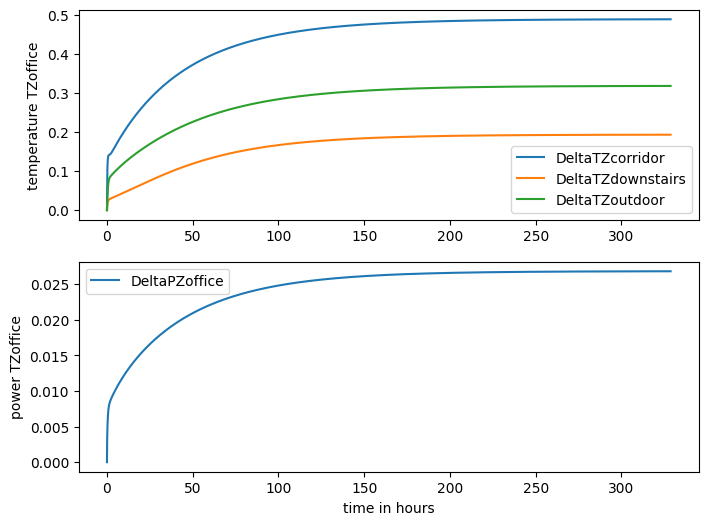

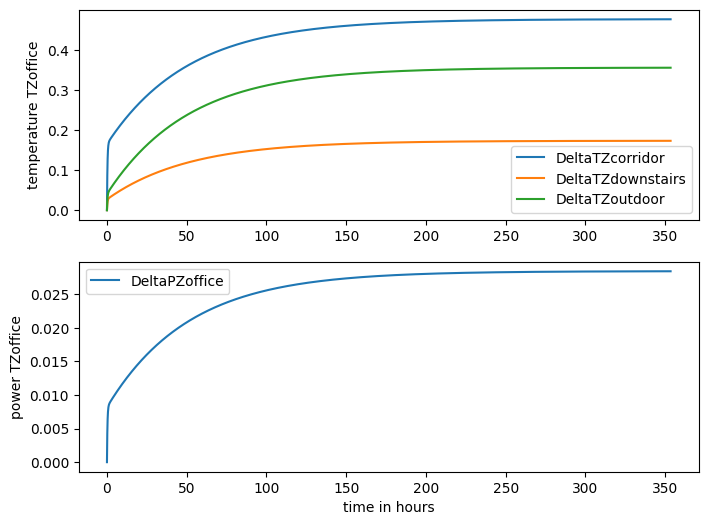

In [6]:
# corridor wall
site_inside_insulation = Site('office', 'corridor', 'downstairs')

door_surface = 80e-2 * 200e-2
door = site_inside_insulation.add_layered_interface('office', 'corridor', InterfaceType.DOOR, door_surface)
door.add_layer('wood', 5e-3)
door.add_layer('air', 15e-3)
door.add_layer('wood', 5e-3)

glass_surface = 100e-2 * 100e-2
glass = site_inside_insulation.add_layered_interface('office', 'corridor', InterfaceType.GLAZING, glass_surface)
glass.add_layer('glass', 4e-3)

internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
cupboard_corridor_surface = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
corridor_wall_surface = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

cupboard = site_inside_insulation.add_layered_interface('office', 'corridor', InterfaceType.WALL, cupboard_corridor_surface)
cupboard.add_layer('wood', 20e-3)
cupboard.add_layer('air', 50e-2 - 20e-3)
cupboard.add_layer('foam', .15)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('foam', 34e-3)
cupboard.add_layer('plaster', 13e-3)

plain_corridor_wall = site_inside_insulation.add_layered_interface('office', 'corridor', InterfaceType.WALL, corridor_wall_surface)
plain_corridor_wall.add_layer('foam', .15)
plain_corridor_wall.add_layer('plaster', 13e-3)
plain_corridor_wall.add_layer('foam', 34e-3)
plain_corridor_wall.add_layer('plaster', 13e-3)

# outdoor wall
west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
east_glass_surface = 36e-2 * 56e-2
windows_surface = west_glass_surface + east_glass_surface
no_cavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
cavity_surface = 315e-2 * 2.5 - west_glass_surface

windows = site_inside_insulation.add_layered_interface('office', 'outdoor', InterfaceType.WALL, windows_surface)
windows.add_layer('glass', 4e-3)
windows.add_layer('air', 12e-3)
windows.add_layer('glass', 4e-3)

plain_wall = site_inside_insulation.add_layered_interface('office', 'outdoor', InterfaceType.WALL, no_cavity_surface)
plain_wall.add_layer('foam', 15e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)
plain_wall.add_layer('concrete', 3e-2)

cavity_wall = site_inside_insulation.add_layered_interface('office', 'outdoor', InterfaceType.WALL, cavity_surface)
cavity_wall.add_layer('foam', .15)
cavity_wall.add_layer('wood', 20e-3)
cavity_wall.add_layer('air', 34e-2)
cavity_wall.add_layer('concrete', 30e-2)

# slab
slab_effective_thickness = 12e-2
slab_surface = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
slab = site_inside_insulation.add_layered_interface('office', 'downstairs', InterfaceType.WALL, slab_surface)
slab.add_layer('foam', .15)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('concrete', slab_effective_thickness/4)
slab.add_layer('air', 20e-2)
slab.add_layer('polystyrene', 7e-3)
bridge = site_inside_insulation.add_component_interface('office', 'outdoor', InterfaceType.BRIDGE, 0.5 * 0.99, 685e-2)  # ThBAT booklet 5, 3.1.1.2, 22B)

site_inside_insulation.simulated_zone('office', 56)
site_inside_insulation.connect_airflow('outdoor', 'office', 1)
site_inside_insulation.connect_airflow('office', 'outdoor', 1)
site_inside_insulation.connect_airflow('office', 'corridor', 1)
site_inside_insulation.connect_airflow('corridor', 'office', 1)

thermal_model, CO2_model = site_inside_insulation.make(order=None, air_flows={'Qoutdoor': 50/3600, 'Qcorridor': 40/3600})
site_inside_insulation.print_thermal_characteristics(thermal_model)
thermal_model, CO2_model = site_inside_insulation.make(order=2, air_flows={'Qoutdoor': 50/3600, 'Qcorridor': 40/3600})
site_inside_insulation.print_thermal_characteristics(thermal_model)

### from outside

In [11]:
from typing import *
from buildingenergy.building import StateModel
from buildingenergy.runner import Runner
import data_h358
import buildingenergy.model
from buildingenergy.parameters import ParameterSet

class H358Model(buildingenergy.model.Model):

    def __init__(self, order: int, parameter_set: ParameterSet):
        super().__init__(order, parameter_set)
        self.param = parameter_set
        self.site = None

    def make_differential_state_model(self, parameter_set: ParameterSet) -> StateModel:
        """
        generate a continuous time state space model: 
        
            d/dt(X(t)) = A(n(t)) X(t) + B(n(t)) U(t)
            Y(t) = C(n(t)) X(t) + D(n(t)) U(t)

        :param parameter_set: set of the parameters, which can be invariant or time-varying (nonlinear inputs). 
        :type parameter_set: ParameterSet
        :param nli_values: _description_
        :type nli_values: Dict[str, float]
        :return: _description_
        :rtype: StateModel
        """
  
        # corridor wall
        self.site = Site('office', 'corridor', 'downstairs')

        door_surface = 80e-2 * 200e-2
        door = self.site.add_layered_interface('office', 'corridor', InterfaceType.DOOR, door_surface)
        door.add_layer('wood', 5e-3)
        door.add_layer('air', 15e-3)
        door.add_layer('wood', 5e-3)

        glass_surface = 100e-2 * 100e-2
        glass = self.site.add_layered_interface('office', 'corridor', InterfaceType.GLAZING, glass_surface)
        glass.add_layer('glass', 4e-3)

        internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
        cupboard_corridor_surface = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
        corridor_wall_surface = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

        cupboard = self.site.add_layered_interface('office', 'corridor', InterfaceType.WALL, cupboard_corridor_surface)
        cupboard.add_layer('wood', 20e-3)
        cupboard.add_layer('air', 50e-2 - 20e-3)
        cupboard.add_layer('plaster', 13e-3)
        cupboard.add_layer('foam', 34e-3)
        cupboard.add_layer('plaster', 13e-3)
        cupboard.add_layer('foam', .15)

        plain_corridor_wall = self.site.add_layered_interface('office', 'corridor', InterfaceType.WALL, corridor_wall_surface)
        plain_corridor_wall.add_layer('plaster', 13e-3)
        plain_corridor_wall.add_layer('foam', 34e-3)
        plain_corridor_wall.add_layer('plaster', 13e-3)
        plain_corridor_wall.add_layer('foam', .15)

        # outdoor wall
        west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
        east_glass_surface = 36e-2 * 56e-2
        windows_surface = west_glass_surface + east_glass_surface
        no_cavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
        cavity_surface = 315e-2 * 2.5 - west_glass_surface

        windows = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, windows_surface)
        windows.add_layer('glass', 4e-3)
        windows.add_layer('air', 12e-3)
        windows.add_layer('glass', 4e-3)

        plain_wall = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, no_cavity_surface)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('concrete', 3e-2)
        plain_wall.add_layer('foam', 15e-2)

        cavity_wall = self.site.add_layered_interface('office', 'outdoor', InterfaceType.WALL, cavity_surface)
        cavity_wall.add_layer('wood', 20e-3)
        cavity_wall.add_layer('air', 34e-2)
        cavity_wall.add_layer('concrete', 30e-2)
        cavity_wall.add_layer('foam', .15)

        # slab
        slab_effective_thickness = 11.9e-2
        slab_surface = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
        slab = self.site.add_layered_interface('office', 'downstairs', InterfaceType.WALL, slab_surface)
        slab.add_layer('concrete', slab_effective_thickness/4)
        slab.add_layer('concrete', slab_effective_thickness/4)
        slab.add_layer('concrete', slab_effective_thickness/4)
        slab.add_layer('concrete', slab_effective_thickness/4)
        slab.add_layer('foam', .15)
        slab.add_layer('air', 20e-2)
        slab.add_layer('polystyrene', 7e-3)
        bridge = self.site.add_component_interface('office', 'outdoor', InterfaceType.BRIDGE, 0.5 * 0.99, 685e-2)  # ThBAT booklet 5, 3.1.1.2, 22B)

        self.site.simulated_zone('office', 56)
        self.site.connect_airflow('outdoor', 'office', 1)
        self.site.connect_airflow('office', 'outdoor', 1)
        self.site.connect_airflow( 'office', 'corridor', 1)
        self.site.connect_airflow( 'corridor', 'office', 1)

        thermal_differential_state_model, CO2_differential_state_model = site.make(order=self.order, air_flows={'Qoutdoor': 50/3600, 'Qcorridor': 40/3600})
        global_differential_state_model = self.site.assemble(thermal_differential_state_model, CO2_differential_state_model)
        return global_differential_state_model
    

class H358runner(Runner):

    def __init__(self):
        super().__init__(('TZcorridor', 'Tcorridor'), ('TZdownstairs', 'Tdownstairs'), ('TZoutdoor', 'weather_temperature'), ('PZoffice', [
            'total_electric_power', 'Psun_window', 'Pmetabolism', 'Pheater']), ('CCO2_corridor', 'corridor_CO2_concentration'), ('CCO2_outdoor', 'outdoorCCO2'), ('PCO2_office', 'CO2production'), ('Qoutdoor', 'Qoutdoor'), ('Qcorridor', 'Qcorridor'), ('TZoffice', 'Toffice_reference'), ('CCO2_office', 'office_CO2_concentration'), ('CCO2_corridor', 'corridor_CO2_concentration'))

    def make_parameter_set(self) -> ParameterSet:
        parameter_set = ParameterSet(resolution=100)
        parameter_set.add_time_varying('Qoutdoor', 50/3600, 2/3600, 540/3600)
        parameter_set.add_invariant('Qoutdoor0', 50/3600)
        parameter_set.add_invariant('Qoutdoor_window', 210/3600, 1/3600, 500/3600)
        parameter_set.add_invariant('Qoutdoor_door', 365/3600, 1/3600, 500/3600)

        parameter_set.add_time_varying('Qcorridor', 40/3600, 2/3600, 540/3600)
        parameter_set.add_invariant('Qcorridor0', 40/3600)
        parameter_set.add_invariant('Qcorridor_window', 246/3600, 1/3600, 500/3600)
        parameter_set.add_invariant('Qcorridor_door', 296/3600, 1/3600, 500/3600)

        parameter_set.add_invariant('body_metabolism', 60)
        parameter_set.add_invariant('heater_power_per_delta_surface_temperature', 90)
        parameter_set.add_invariant('CO2_occupant_breath_production', 2)
        parameter_set.add_invariant('solar_factor', .4)
        return parameter_set

    def make_invariant_data(self) -> buildingenergy.data.Data:
        return data_h358.H358Data('16/02/2015', '23/02/2015') # '16/02/2015', '23/02/2015'

    def make_parameterized_data(self, parameter_set, data):
        data_h358.Qoutdoor(data, parameter_set)
        data_h358.Qcorridor(data, parameter_set)
        data_h358.CO2production(data, parameter_set)
        data_h358.Pheater(data, parameter_set)
        data_h358.Pheat(data, parameter_set)
        data_h358.Pmetabolim(data, parameter_set)

    def get_model(self, inparam_set: ParameterSet) -> Model:
        return H358Model(order=None, parameter_set=inparam_set)

    def get_controlled_linear_inputs(self, k: int, linear_input_names: List[str]) -> Dict[str, float]:
        pass

    def get_controlled_nonlinear_inputs(self, k: int, nonlinear_input_names: List[str]) -> Dict[str, float]:
        pass
    
runner = H358runner()
#runner.get_model(parameter_set).site.print_thermal_characteristics(thermal_model)
runner.simulate()
runner.memorize('_outinsu', inputs=False)

variables read from file measurement file:
stringtime, epochtime, datetime, Toffice_wall, Tcorridor, Theater, Toffice_reference, office_CO2_concentration, corridor_CO2_concentration, zetaW7, zetaW9, window_opening, door_opening, power_block_east, power_block_west, power_stephane, power_khadija, power_audrey, power_stagiaire, humidity, Tyanis, occupancy, detected_motions, illuminance_old, illuminance_new, dT_heat, power_heater, heating_level, total_electric_power, actual_occupation, acoustic_pressure_dB, 
Variable zetaW7 has been removed
Variable zetaW9 has been removed
Variable humidity has been removed
Variable Tyanis has been removed
Variable occupancy has been removed
Variable power_heater has been removed
* available location> Grenoble
Weather data variables:
weather_epochtimems, weather_temperature, weather_cloudiness, 
*

AttributeError: 'Site' object has no attribute '_nlis'